# Data mining - HW6 - decision tree & SVM & Nueral network
## Parsa KamaliPour - 97149081

### importing libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display_functions import display
from sklearn import tree, metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import graphviz

### loading data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


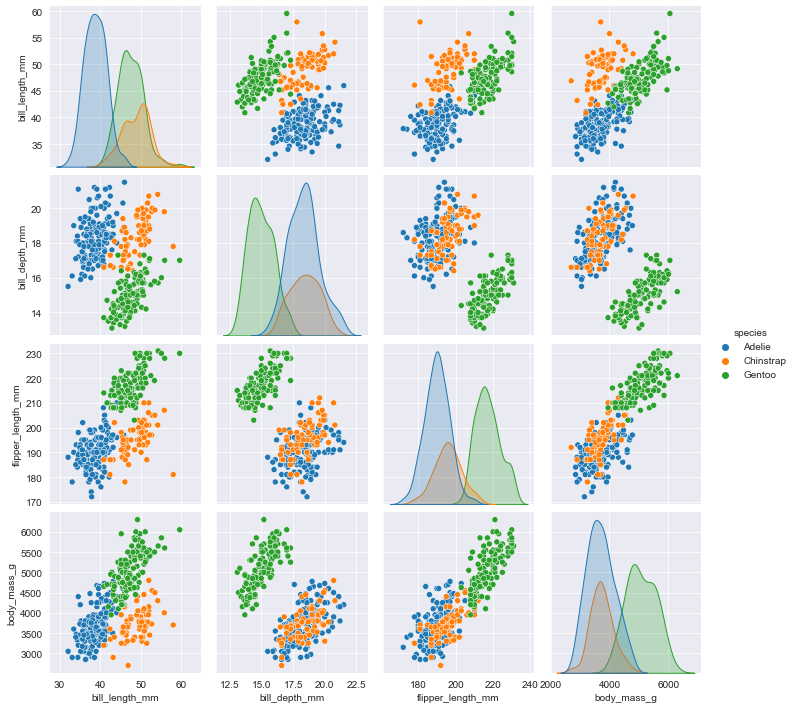

In [64]:
penguins = pd.read_csv('penguins.csv')
# plot the data
display(penguins)
sns.pairplot(penguins, hue='species')
plt.show()

## 1.1 - remove the missing values in the data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


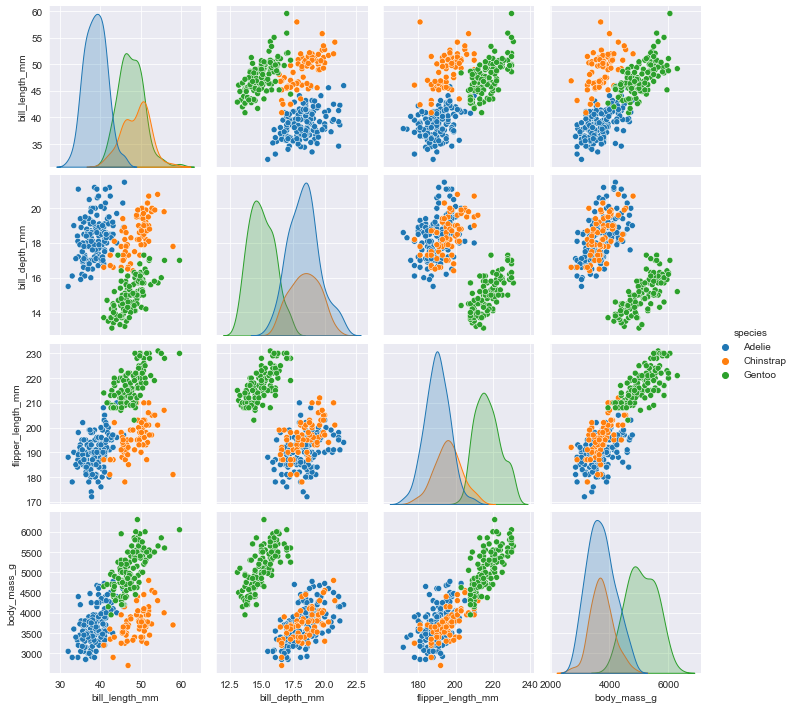

In [65]:
og_penguins = penguins.copy()
penguins.dropna(inplace=True)
display(penguins)
sns.pairplot(penguins, hue='species')
plt.show()

In [66]:
# reset index
penguins.reset_index(drop=True, inplace=True)
display(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## normalize the data

In [67]:
ss = StandardScaler()
penguins.iloc[:, 2:-1] = ss.fit_transform(penguins.iloc[:, 2:-1])
display(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,MALE
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,FEMALE
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,FEMALE
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,FEMALE
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,FEMALE
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,FEMALE
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,MALE
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,FEMALE


In [68]:
le = LabelEncoder()
penguins['species'] = le.fit_transform(penguins['species'])
display(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,MALE
1,0,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,FEMALE
2,0,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,FEMALE
3,0,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,FEMALE
4,0,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,MALE
...,...,...,...,...,...,...,...
328,2,Biscoe,0.587352,-1.762145,0.931283,0.892957,FEMALE
329,2,Biscoe,0.514098,-1.457000,1.002739,0.799674,FEMALE
330,2,Biscoe,1.173384,-0.744994,1.502928,1.919069,MALE
331,2,Biscoe,0.221082,-1.202712,0.788372,1.234995,FEMALE


In [69]:
penguins['island'] = le.fit_transform(penguins['island'])
display(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,MALE
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,FEMALE
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,FEMALE
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,FEMALE
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,MALE
...,...,...,...,...,...,...,...
328,2,0,0.587352,-1.762145,0.931283,0.892957,FEMALE
329,2,0,0.514098,-1.457000,1.002739,0.799674,FEMALE
330,2,0,1.173384,-0.744994,1.502928,1.919069,MALE
331,2,0,0.221082,-1.202712,0.788372,1.234995,FEMALE


In [70]:
penguins['sex'] = le.fit_transform(penguins['sex'])
display(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...,...,...
328,2,0,0.587352,-1.762145,0.931283,0.892957,0
329,2,0,0.514098,-1.457000,1.002739,0.799674,0
330,2,0,1.173384,-0.744994,1.502928,1.919069,1
331,2,0,0.221082,-1.202712,0.788372,1.234995,0


## 1.2 - split test and train

In [71]:
X = penguins.iloc[:, 1:]
display(X)
y = penguins['species']
display(y)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,2,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...,...
328,0,0.587352,-1.762145,0.931283,0.892957,0
329,0,0.514098,-1.457000,1.002739,0.799674,0
330,0,1.173384,-0.744994,1.502928,1.919069,1
331,0,0.221082,-1.202712,0.788372,1.234995,0


0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species, Length: 333, dtype: int32

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 1.3 - decision tree

In [73]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.65, 0.9285714285714286, 'X[3] <= 0.467\ngini = 0.639\nsamples = 266\nvalue = [115, 54, 97]'),
 Text(0.45, 0.7857142857142857, 'X[1] <= -0.154\ngini = 0.432\nsamples = 164\nvalue = [113, 50, 1]'),
 Text(0.25, 0.6428571428571429, 'X[1] <= -0.31\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.15, 0.5, 'X[2] <= -0.262\ngini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.1, 0.35714285714285715, 'X[1] <= -0.823\ngini = 0.18\nsamples = 10\nvalue = [9, 1, 0]'),
 Text(0.05, 0.21428571428571427, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(0.15, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 95\nvalue = [95, 0, 0]'),
 Text(0.35, 0.5, 'X[5] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.3, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.65, 0.6428571428571429, 'X[

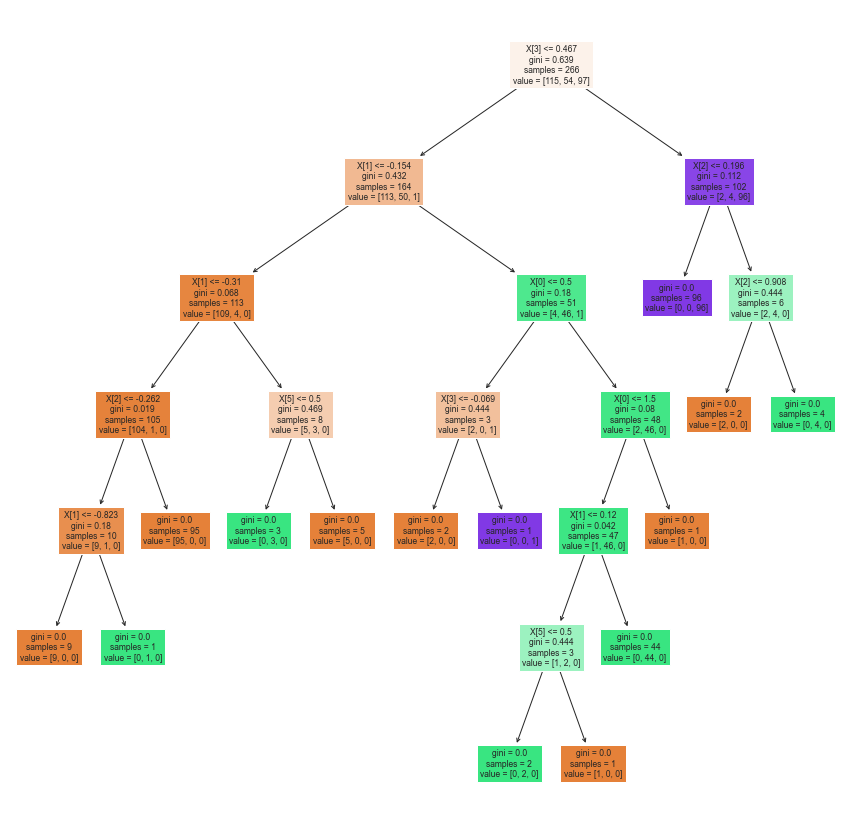

In [74]:
plt.figure(figsize=(15, 15))
tree.plot_tree(d_tree, filled=True)

In [75]:
y_pred = d_tree.predict(X_test)

In [76]:
d_tree.score(X_test, y_test)

1.0

In [77]:
cm = confusion_matrix(y_test, y_pred)

In [78]:
cm

array([[31,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 22]], dtype=int64)

In [79]:
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

1.0

In [80]:
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



## 2.1 - SVM

In [81]:
bill = pd.read_csv('bill_authentication.csv')
display(bill)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [82]:
bill.dropna(inplace=True)
display(bill)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [83]:
bill.reset_index(drop=True, inplace=True)

In [84]:
display(bill)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [85]:
ss = StandardScaler()
bill.iloc[:, 0:-1] = ss.fit_transform(bill.iloc[:, 0:-1])
display(bill)

,Variance,Skewness,Curtosis,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


In [86]:
X_train, X_test, y_train, y_test = train_test_split(bill.iloc[:, 0:-1], bill['Class'], test_size=0.2)
display(X_train, X_test, y_train, y_test)

,Variance,Skewness,Curtosis,Entropy
1034,0.086259,0.374566,-1.384863,-1.404474
86,-0.550734,-0.003179,1.424238,1.053998
492,-0.800512,1.518389,0.318298,-0.903914
1049,-1.545939,0.359056,-0.407588,-1.287488
970,-0.972520,-2.024159,1.642808,-0.324554
...,...,...,...,...
1202,-0.400178,0.176353,-1.158727,-0.930387
927,-1.427455,0.353414,-0.407588,-1.291773
538,0.101623,-0.336832,0.991694,-0.075821
583,0.680595,-1.493351,1.630066,0.353942


,Variance,Skewness,Curtosis,Entropy
688,0.769801,0.659555,-0.309146,-0.182952
728,-0.018966,-0.206685,-0.148653,0.355790
81,1.419723,0.062784,-0.102117,0.962856
1188,-1.215400,-0.442291,0.303583,0.975788
940,-0.086235,-0.208095,-0.443186,0.570050
...,...,...,...,...
771,-0.499392,-1.463011,1.027484,0.827406
204,0.140473,0.957582,-0.173514,0.126755
950,-0.887783,-0.410194,0.071110,1.397529
131,1.652680,1.150171,-0.995467,-0.150908


1034    1
86      0
492     0
1049    1
970     1
       ..
1202    1
927     1
538     0
583     0
1033    1
Name: Class, Length: 1097, dtype: int64

688     0
728     0
81      0
1188    1
940     1
       ..
771     1
204     0
950     1
131     0
87      0
Name: Class, Length: 275, dtype: int64

In [87]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [88]:
svm.score(X_test, y_test)

0.9927272727272727

In [89]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[155,   2],
       [  0, 118]], dtype=int64)

In [90]:
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [91]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [92]:
display(svm.score(X_test, y_test))
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

1.0

array([[157,   0],
       [  0, 118]], dtype=int64)

In [93]:
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



# 3.1 - Neural network

In [94]:
display(bill)
display(X_train, X_test, y_train, y_test)

,Variance,Skewness,Curtosis,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


,Variance,Skewness,Curtosis,Entropy
1034,0.086259,0.374566,-1.384863,-1.404474
86,-0.550734,-0.003179,1.424238,1.053998
492,-0.800512,1.518389,0.318298,-0.903914
1049,-1.545939,0.359056,-0.407588,-1.287488
970,-0.972520,-2.024159,1.642808,-0.324554
...,...,...,...,...
1202,-0.400178,0.176353,-1.158727,-0.930387
927,-1.427455,0.353414,-0.407588,-1.291773
538,0.101623,-0.336832,0.991694,-0.075821
583,0.680595,-1.493351,1.630066,0.353942


,Variance,Skewness,Curtosis,Entropy
688,0.769801,0.659555,-0.309146,-0.182952
728,-0.018966,-0.206685,-0.148653,0.355790
81,1.419723,0.062784,-0.102117,0.962856
1188,-1.215400,-0.442291,0.303583,0.975788
940,-0.086235,-0.208095,-0.443186,0.570050
...,...,...,...,...
771,-0.499392,-1.463011,1.027484,0.827406
204,0.140473,0.957582,-0.173514,0.126755
950,-0.887783,-0.410194,0.071110,1.397529
131,1.652680,1.150171,-0.995467,-0.150908


1034    1
86      0
492     0
1049    1
970     1
       ..
1202    1
927     1
538     0
583     0
1033    1
Name: Class, Length: 1097, dtype: int64

688     0
728     0
81      0
1188    1
940     1
       ..
771     1
204     0
950     1
131     0
87      0
Name: Class, Length: 275, dtype: int64

In [95]:
nn = MLPClassifier(hidden_layer_sizes=(16, 16))
nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16, 16))

In [96]:
display(nn.score(X_test, y_test))

1.0

In [97]:
y_pred = nn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[157,   0],
       [  0, 118]], dtype=int64)

In [98]:
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [207]:
accuracy_list = []
def create_network_with_n_layers(n_layers, n_nodes):
    accuracy_list = []
    tup = (n_nodes for i in range(n_layers))
    nn = MLPClassifier(hidden_layer_sizes=tup)
    nn.fit(X_train, y_train)
    # display(nn.score(X_test, y_test))
    # accuracy_list.append([n_layers, n_nodes, nn.score(X_test, y_test)])
    accuracy_list.extend([n_layers, n_nodes, nn.score(X_test, y_test)])
    y_pred = nn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    # print(cm)
    classification_report = metrics.classification_report(y_test, y_pred)
    # print(classification_report)
    return accuracy_list

In [184]:
create_network_with_n_layers(3, 15)

1.0

[[157   0]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



[3, 15, 1.0]

In [208]:
uno_layer = []
for n_node in range(2, 21):
    uno_layer.append(create_network_with_n_layers(1, n_node))

print(uno_layer)

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[1, 2, 0.92], [1, 3, 0.9854545454545455], [1, 4, 0.9927272727272727], [1, 5, 0.9927272727272727], [1, 6, 0.9927272727272727], [1, 7, 0.9927272727272727], [1, 8, 0.9890909090909091], [1, 9, 0.9927272727272727], [1, 10, 0.9890909090909091], [1, 11, 0.9927272727272727], [1, 12, 0.9890909090909091], [1, 13, 0.9927272727272727], [1, 14, 0.9927272727272727], [1, 15, 0.9927272727272727], [1, 16, 0.9927272727272727], [1, 17, 1.0], [1, 18, 1.0], [1, 19, 1.0], [1, 20, 0.9927272727272727]]


d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [209]:
uno_layer

[[1, 2, 0.92],
 [1, 3, 0.9854545454545455],
 [1, 4, 0.9927272727272727],
 [1, 5, 0.9927272727272727],
 [1, 6, 0.9927272727272727],
 [1, 7, 0.9927272727272727],
 [1, 8, 0.9890909090909091],
 [1, 9, 0.9927272727272727],
 [1, 10, 0.9890909090909091],
 [1, 11, 0.9927272727272727],
 [1, 12, 0.9890909090909091],
 [1, 13, 0.9927272727272727],
 [1, 14, 0.9927272727272727],
 [1, 15, 0.9927272727272727],
 [1, 16, 0.9927272727272727],
 [1, 17, 1.0],
 [1, 18, 1.0],
 [1, 19, 1.0],
 [1, 20, 0.9927272727272727]]

,n_layers,n_nodes,accuracy
0,1,2,0.920000
1,1,3,0.985455
2,1,4,0.992727
3,1,5,0.992727
4,1,6,0.992727
5,1,7,0.992727
6,1,8,0.989091
7,1,9,0.992727
8,1,10,0.989091
9,1,11,0.992727


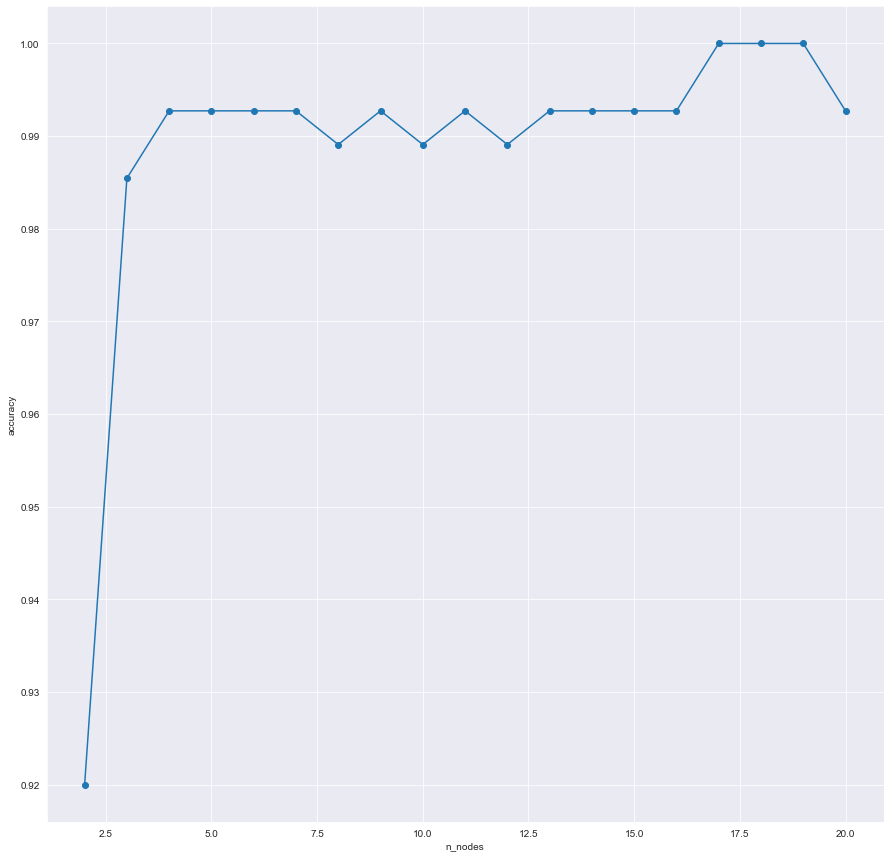

In [210]:
uno_layer = pd.DataFrame(uno_layer, columns=['n_layers', 'n_nodes', 'accuracy'])
display(uno_layer)
plt.figure(figsize=(15, 15))
plt.plot(uno_layer['n_nodes'], uno_layer['accuracy'], 'o-')
plt.xlabel('n_nodes')
plt.ylabel('accuracy')
plt.show()

In [211]:
duo_layer = []
for n_layer in range(1, 10):
    for n_node in range(2, 21):
        duo_layer.append(create_network_with_n_layers(n_layer, n_node))

print(uno_layer)

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


    n_layers  n_nodes  accuracy
0          1        2  0.920000
1          1        3  0.985455
2          1        4  0.992727
3          1        5  0.992727
4          1        6  0.992727
5          1        7  0.992727
6          1        8  0.989091
7          1        9  0.992727
8          1       10  0.989091
9          1       11  0.992727
10         1       12  0.989091
11         1       13  0.992727
12         1       14  0.992727
13         1       15  0.992727
14         1       16  0.992727
15         1       17  1.000000
16         1       18  1.000000
17         1       19  1.000000
18         1       20  0.992727


In [212]:
print(duo_layer)

[[1, 2, 0.9781818181818182], [1, 3, 0.9527272727272728], [1, 4, 0.9927272727272727], [1, 5, 0.9927272727272727], [1, 6, 1.0], [1, 7, 0.9927272727272727], [1, 8, 0.9927272727272727], [1, 9, 0.9927272727272727], [1, 10, 0.9927272727272727], [1, 11, 0.9927272727272727], [1, 12, 0.9927272727272727], [1, 13, 0.9927272727272727], [1, 14, 1.0], [1, 15, 0.9927272727272727], [1, 16, 0.9927272727272727], [1, 17, 1.0], [1, 18, 0.9927272727272727], [1, 19, 0.9927272727272727], [1, 20, 0.9927272727272727], [2, 2, 0.9927272727272727], [2, 3, 0.9927272727272727], [2, 4, 1.0], [2, 5, 0.9890909090909091], [2, 6, 0.9854545454545455], [2, 7, 0.9927272727272727], [2, 8, 1.0], [2, 9, 1.0], [2, 10, 1.0], [2, 11, 1.0], [2, 12, 1.0], [2, 13, 1.0], [2, 14, 1.0], [2, 15, 1.0], [2, 16, 1.0], [2, 17, 1.0], [2, 18, 1.0], [2, 19, 1.0], [2, 20, 1.0], [3, 2, 0.9927272727272727], [3, 3, 1.0], [3, 4, 1.0], [3, 5, 1.0], [3, 6, 1.0], [3, 7, 1.0], [3, 8, 1.0], [3, 9, 1.0], [3, 10, 1.0], [3, 11, 1.0], [3, 12, 1.0], [3, 13,

,n_layers,n_nodes,accuracy
0,1,2,0.978182
1,1,3,0.952727
2,1,4,0.992727
3,1,5,0.992727
4,1,6,1.000000
...,...,...,...
166,9,16,1.000000
167,9,17,1.000000
168,9,18,1.000000
169,9,19,1.000000


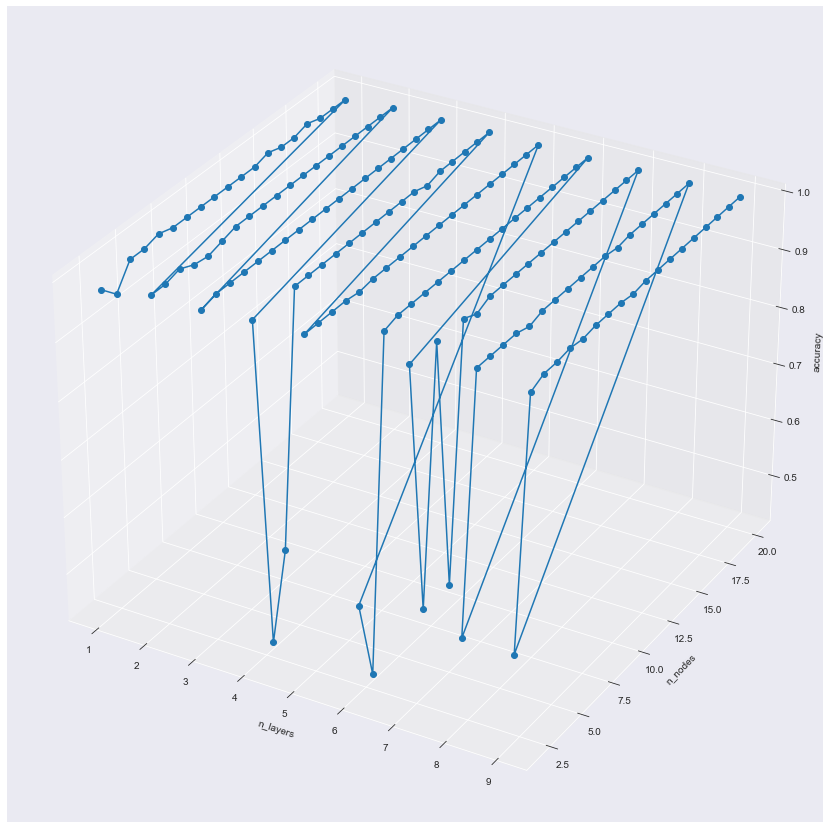

In [218]:
duo_layer = pd.DataFrame(duo_layer, columns=['n_layers', 'n_nodes', 'accuracy'])
display(duo_layer)
plt.figure(figsize=(15, 15))
# 3d plot of accuracy vs n_layers and n_nodes (3d plot of accuracy vs n_layers and n_nodes)
ax = plt.axes(projection='3d')
ax.plot3D(duo_layer['n_layers'], duo_layer['n_nodes'], duo_layer['accuracy'], 'o-')
ax.set_xlabel('n_layers')
ax.set_ylabel('n_nodes')
ax.set_zlabel('accuracy')
plt.show()